<a href="https://colab.research.google.com/github/mrdso2-iscte/IAA_PROJECT/blob/main/IAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

http://hdl.handle.net/10071/23232



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

# **Todo o dataset**

In [ ]:
d0=pd.read_csv('2010.csv',sep = ';', encoding="ISO-8859-1")
d1=pd.read_csv('2011.csv',sep = ';', encoding="ISO-8859-1")
d2=pd.read_csv('2012.csv',sep = ';', encoding="ISO-8859-1")
d3=pd.read_csv('2013.csv',sep = ';', encoding="ISO-8859-1")
d4=pd.read_csv('2014.csv',sep = ';', encoding="ISO-8859-1")
d5=pd.read_csv('2015.csv',sep = ';', encoding="ISO-8859-1")
d6=pd.read_csv('2016.csv',sep = ';', encoding="ISO-8859-1")
d7=pd.read_csv('2017.csv',sep = ';', encoding="ISO-8859-1")
d8=pd.read_csv('2018.csv',sep = ';', encoding="ISO-8859-1")
d9=pd.read_csv('2019.csv',sep = ';', encoding="ISO-8859-1")
data=pd.concat([d0, d1,d2,d3,d4,d5,d6,d7,d8,d9], sort=False)


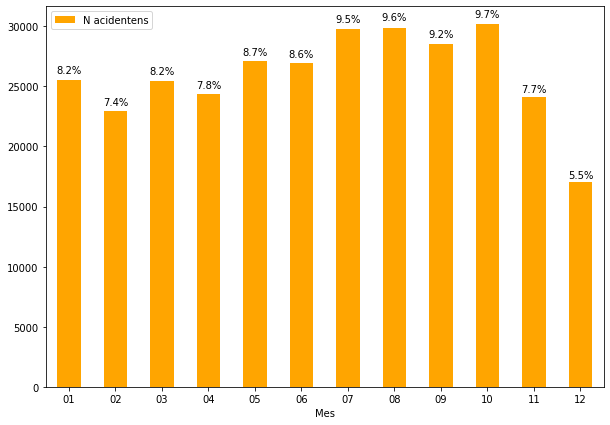

In [ ]:
percentages=[]

mes_groupby=data.groupby(data['Datahora'].str.split(':').str[1])
df = pd.DataFrame({'Mes':mes_groupby.groups.keys(), 'N acidentens':mes_groupby.size()})
ax = df.plot.bar(x='Mes', y='N acidentens', rot=0,figsize=(10, 7),color='orange')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    percentages.append(height/len(data)) 
    ax.annotate(f'{round(height/len(data)*100,1)}%', (x + width/2, y + height*1.02), ha='center')


In [ ]:
new_data= pd.DataFrame(columns = data.columns)
datas=[]

for name, group in mes_groupby:
  d=group.sample(int(round(10000*percentages[int(name)-1]))) 
  new_data.append(d, ignore_index = True)
  datas.append(d)


new_data=datas[0]

for i in range(1,12):
 new_data=pd.concat([new_data,datas[i]], ignore_index = True)

In [ ]:
new_data

,Id. Acidente,Datahora,Dia,Mês,Hora,Entidades Fiscalizadoras,Velocidade local,Velocidade geral,Dia da Semana,Latitude GPS,...,Obstáculos,Sentidos,Sinais,Sinais Luminosos,Tipo Piso,Traçado 1,Traçado 2,Traçado 3,Traçado 4,Via Trânsito
0,2013683017,2013:01:21 17:05:00,01/21/00,01/01/00,01/01/00,Guarda Nacional Republicana,50.0,50.0,Segunda-Feira,NaN,...,Inexistentes,NÃO DEFINIDO,Stop,Inexistentes,Betuminoso,Recta,Com inclinação,Berma pavimentada,Em plena via,Direita
1,2011503904,2011:01:08 11:30:00,01/08/00,01/01/00,01/01/00,Polícia de Segurança Pública,50.0,50.0,Sábado,"0,00",...,Inexistentes,NÃO DEFINIDO,NÃO DEFINIDO,Inexistentes,Calçada,Curva,Com inclinação,Sem berma ou impraticável,Em plena via,Direita
2,2010429188,2010:01:24 19:10:00,01/24/00,01/01/00,01/01/00,Polícia de Segurança Pública,90.0,90.0,Domingo,"39,510948",...,Inexistentes,NÃO DEFINIDO,Outros,Inexistentes,Betuminoso,Recta,Com inclinação,Berma não pavimentada,Em plena via,Direita
3,2010437471,2010:01:08 08:05:00,01/08/00,01/01/00,01/01/00,Guarda Nacional Republicana,50.0,50.0,Sexta-Feira,NaN,...,Inexistentes,NÃO DEFINIDO,NÃO DEFINIDO,Inexistentes,Betuminoso,Curva,Com inclinação,Berma pavimentada,Em plena via,Direita
4,20171186548,2017:01:22 19:30:00,01/22/00,01/01/00,01/01/00,Polícia de Segurança Pública,100.0,100.0,Domingo,"38,742541",...,Inexistentes,No sentido crescente da quilometragem,Outros,Inexistentes,Betuminoso,Recta,Com inclinação,Berma pavimentada,Em plena via,Esquerda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,20171213530,2016:12:19 12:30:00,01/19/00,12/01/00,01/01/00,Guarda Nacional Republicana,100.0,120.0,Segunda-Feira,"41,093645",...,Inexistentes,No sentido crescente da quilometragem,Outros,Inexistentes,Betuminoso,Recta,Em patamar,Sem berma ou impraticável,Em plena via,Esquerda
9996,2015912306,2014:12:06 05:15:00,01/06/00,12/01/00,01/01/00,Guarda Nacional Republicana,50.0,50.0,Sábado,"41,171294",...,Inexistentes,NÃO DEFINIDO,NÃO DEFINIDO,Inexistentes,Betuminoso,Recta,Em patamar,Berma pavimentada,Em plena via,Direita
9997,2014878562,2014:12:22 11:30:00,01/22/00,12/01/00,01/01/00,Polícia de Segurança Pública,50.0,50.0,Segunda-Feira,"38,954291",...,Inexistentes,NÃO DEFINIDO,Passagem de peões,A funcionar normalmente,Betuminoso,Recta,Em patamar,Berma pavimentada,Em plena via,Direita
9998,2010494595,2010:12:04 20:00:00,01/04/00,12/01/00,01/01/00,Polícia de Segurança Pública,50.0,50.0,Sábado,"0,00",...,Inexistentes,No sentido decrescente da quilometragem,Outros,Inexistentes,Betuminoso,Recta,Em patamar,Berma pavimentada,Em plena via,Esquerda


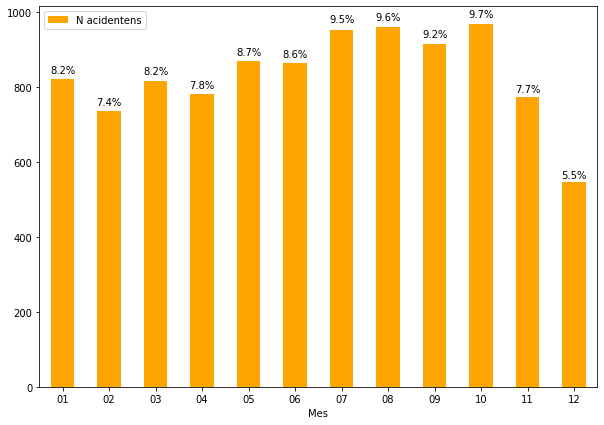

In [ ]:
percentages=[]
mes_groupby=new_data.groupby(new_data['Datahora'].str.split(':').str[1])
df = pd.DataFrame({'Mes':mes_groupby.groups.keys(), 'N acidentens':mes_groupby.size()})
ax = df.plot.bar(x='Mes', y='N acidentens', rot=0,figsize=(10, 7),color='orange')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    percentages.append(height/len(new_data)) 
    ax.annotate(f'{round(height/len(new_data)*100,1)}%', (x + width/2, y + height*1.02), ha='center')

In [195]:
new_data.to_csv('acidentes.csv', index=False)

NameError: ignored

# **Data Understanding**

## **Pergunta 1**

1. Extract a random sample of 10000+ examples taking random examples from all files
from 2010 to 2019. Save the sample;

In [6]:
acidentes_df=pd.read_csv('acidentes.csv',sep = ',')

In [7]:
acidentes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Id. Acidente                     10000 non-null  int64  
 1   Datahora                         10000 non-null  object 
 2   Dia                              10000 non-null  object 
 3   Mês                              10000 non-null  object 
 4   Hora                             10000 non-null  object 
 5   Entidades Fiscalizadoras         10000 non-null  object 
 6   Velocidade local                 9893 non-null   float64
 7   Velocidade geral                 9989 non-null   float64
 8   Dia da Semana                    10000 non-null  object 
 9   Latitude GPS                     8994 non-null   object 
 10  Longitude GPS                    8990 non-null   object 
 11  Num. Mortos a 30 dias            10000 non-null  int64  
 12  Num. Feridos graves

In [8]:
import io
buffer = io.StringIO()
acidentes_df.info(buf=buffer)
s = buffer.getvalue()
with open("df_info.csv", "w",
          encoding="utf-8") as f:  
    f.write(s)

## **Pergunta 2**


2. Decide which (if any) characteristics should be normalized, discretized, or change format
in any way. Perform these transformations in the sample and save the new file
under a different name;

### Categorizaçao Periodos do Dia

In [9]:
acidentes_df['Periodo do Dia']=acidentes_df['Datahora'].str.split(' ').str[-1]     

## METER A COLUNA DATAHORA PARA DATETIME
acidentes_df['Periodo do Dia'] = pd.to_datetime(acidentes_df['Periodo do Dia'])
     

In [10]:

slots=['06:00:00','12:00:00','18:00:00']
hours=pd.to_datetime(slots)

day_slots=[]
for index in acidentes_df.index:
  
  if acidentes_df['Periodo do Dia'][index] < hours[0]:
    day_slots.append('Madrugada')
  elif (acidentes_df['Periodo do Dia'][index] >= hours[0]) & (acidentes_df['Periodo do Dia'][index] < hours[1]):
    day_slots.append('Manha')
  elif  (acidentes_df['Periodo do Dia'][index] >= hours[1]) & (acidentes_df['Periodo do Dia'][index] < hours[2]):
    day_slots.append('Tarde')
  else:
    day_slots.append('Noite')



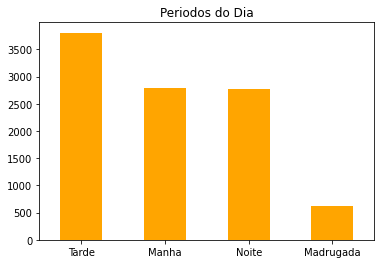

In [11]:
acidentes_df['Periodo do Dia']=day_slots
acidentes_df['Periodo do Dia'].value_counts().plot(kind = 'bar',rot = 0,color='orange',title="Periodos do Dia")

### Categorização Tipo de acidentes

In [12]:
accident_type=[]
for index in acidentes_df.index: 
  if (acidentes_df['Num. Mortos a 30 dias'][index]>0):    
    accident_type.append('muito grave')
  elif (acidentes_df['Num. Feridos graves a 30 dias'][index]>0) & (acidentes_df['Num. Mortos a 30 dias'][index]==0):
    accident_type.append('grave')
  else:
     accident_type.append('ligeiro')
print(len(accident_type))


10000


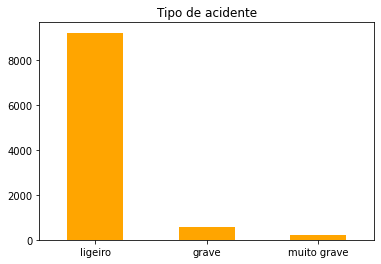

In [13]:
acidentes_df['Tipo de Acidente']=accident_type
acidentes_df['Tipo de Acidente'].value_counts().plot(kind = 'bar',rot = 0,color='orange',title="Tipo de acidente")

### Categorização concelhos

In [14]:
acidentes_df=acidentes_df.replace('Sobral Monte Agraco','Sobral de Monte Agraco')
acidentes_df=acidentes_df.replace('Lagoa (Algarve)','Lagoa')
acidentes_df=acidentes_df.replace('Freixo Espada a Cinta','Freixo de Espada a Cinta')


In [15]:
nuts_site_df=pd.read_csv('nuts_site.csv',sep = ';', encoding="ISO-8859-1")
nuts_site_df= nuts_site_df[['NUTS II','CONCELHO']]
drop_elements= nuts_site_df[(nuts_site_df['NUTS II']=='REGIÃO AUTÓNOMA DOS AÇORES') | (nuts_site_df['NUTS II']=='REGIÃO AUTÓNOMA DA MADEIRA')].index
nuts_site_df.drop(drop_elements, inplace=True)
nuts_site_df = nuts_site_df.drop_duplicates(keep='first')
cols = nuts_site_df.select_dtypes(include=[object]).columns
nuts_site_df[cols] = nuts_site_df[cols].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))
nuts_site_df





,NUTS II,CONCELHO
0,CENTRO,Agueda
11,CENTRO,Albergaria-a-Velha
17,CENTRO,Anadia
27,NORTE,Arouca
43,CENTRO,Aveiro
...,...,...
2816,NORTE,Tarouca
2823,CENTRO,Tondela
2842,CENTRO,Vila Nova de Paiva
2847,CENTRO,Viseu


In [16]:
for ind in acidentes_df['Concelho'].index:
  concelho =acidentes_df['Concelho'][ind]
  zona=nuts_site_df[(nuts_site_df['CONCELHO']==concelho)].values
  acidentes_df['Concelho'][ind]=zona[0][0]


<ipython-input-16-83936394670b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acidentes_df['Concelho'][ind]=zona[0][0]


In [17]:
pd.unique(acidentes_df['Concelho'])


array(['NORTE', 'AREA METROPOLITANA DE LISBOA', 'CENTRO', 'ALGARVE',
       'ALENTEJO'], dtype=object)

In [18]:
acidentes_df=acidentes_df.rename(columns={"Concelho": "Zona"})

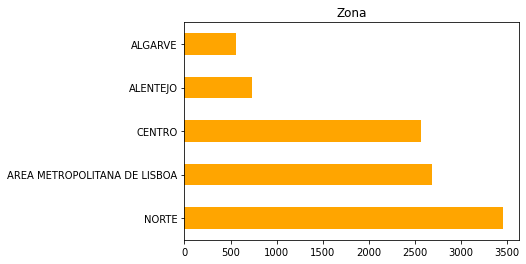

In [19]:
acidentes_df['Zona'].value_counts().plot(kind = 'barh',rot = 0,color='orange',title="Zona")

### Normalização velocidade

In [20]:

velocidades=np.unique(acidentes_df['Velocidade local'])
velocidade_local_not_null=acidentes_df[acidentes_df['Velocidade local'].notnull()]
velocidade_local_null=acidentes_df[acidentes_df['Velocidade local'].isnull()]
velocidade_geral_null=acidentes_df[acidentes_df['Velocidade geral'].isnull()]

for ind in velocidade_local_null.index:
 
  if(pd.isnull(acidentes_df['Velocidade geral'][ind]) ):    
    tipo_via=acidentes_df['Tipos Vias'][ind]
    velocidade=[]
    velocidade += [acidentes_df['Velocidade local'][index] for index in velocidade_local_not_null.index if acidentes_df['Tipos Vias'][index] == tipo_via]
    mean_velocidade=(np.mean(velocidade))    
    closest = min(velocidades, key=lambda x: abs(x-mean_velocidade))
    acidentes_df['Velocidade local'][ind]= closest

  else:
    acidentes_df['Velocidade local'][ind]= acidentes_df['Velocidade geral'][ind]




<ipython-input-20-1f5f1a693b91>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acidentes_df['Velocidade local'][ind]= acidentes_df['Velocidade geral'][ind]
<ipython-input-20-1f5f1a693b91>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acidentes_df['Velocidade local'][ind]= closest


### Vizualização 'Características Tecnicas1','Tipos Vias'

In [21]:
groupby = acidentes_df.groupby([ 'Características Tecnicas1','Tipos Vias']).size()
print(groupby)

Características Tecnicas1  Tipos Vias                  
Auto-estrada               A  - Auto-Estrada                617
                           Outra Via                          1
Estrada sem separador      Arruamento                      5189
                           EF - Estrada Florestal            18
                           EM - Estrada Municipal           523
                           EN - Estrada Nacional           2031
                           ER - Estrada Regional             55
                           IC - Itinerário Complementar     100
                           IP- Itinerário Principal          24
                           Outra Via                        168
                           VAR - Variante                    27
NÃO DEFINIDO               Arruamento                        33
                           EF - Estrada Florestal             1
                           EM - Estrada Municipal             5
                           EN - Estrada Nacional

### Rename coluna Datahora

In [22]:
acidentes_df['Data']=acidentes_df['Datahora'].str.split(' ').str[0]

### Categorização Natureza do acidente

In [23]:
despiste=['Despiste sem dispositivo de retenção', 'Despiste simples','Despiste com colisão com veículo imobil. ou obstáculo','Despiste com capotamento', 'Despiste com dispositivo de retenção',
       'Despiste com transposição do dispositivo de retenção lateral',
       'Despiste com fuga']
colisão=['Colisão traseira com outro veículo em movimento','Colisão lateral com outro veículo em movimento'
,'Colisão frontal', 'Colisão com outras situações','Colisão choque em cadeia','Colisão com veiculo ou obstáculo na faixa de rodagem','Colisão com fuga']
atropelamento=['Atropelamento de peões', 'Atropelamento de animais',  'Atropelamento com fuga' ]
natureza_type=[]
for index in acidentes_df.index: 
  if (acidentes_df['Natureza'][index] in despiste ):    
    natureza_type.append('despiste')
  elif (acidentes_df['Natureza'][index] in colisão ):
   natureza_type.append('colisão')
  else:
    natureza_type.append('atropelamento')
print(len(natureza_type))

10000


In [24]:
acidentes_df['Natureza']=natureza_type

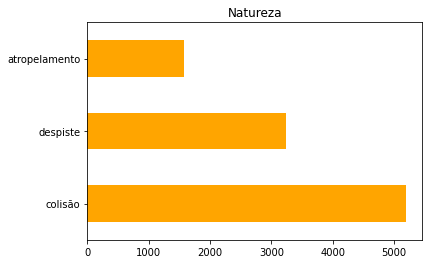

In [25]:
acidentes_df['Natureza'].value_counts().plot(kind = 'barh',rot = 0,color='orange',title="Natureza")

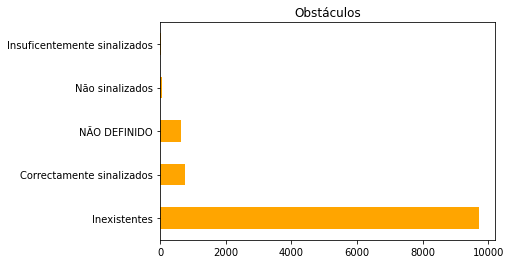

In [26]:
acidentes_df['Sentidos'].value_counts().plot(kind = 'barh',rot = 0,color='orange',title="Sentidos")
acidentes_df['Obstáculos'].value_counts().plot(kind = 'barh',rot = 0,color='orange',title="Obstáculos")

In [27]:
acidentes_df=acidentes_df.drop(['Id. Acidente','Datahora','Dia','Hora','Mês','Entidades Fiscalizadoras','Num. Mortos a 30 dias','Num. Feridos graves a 30 dias','Num. Feridos ligeiros a 30 dias', 'Obstáculos','Características Tecnicas1','Sentidos','Velocidade geral','Latitude GPS','Km','Longitude GPS','Distrito', 'Freguesia', 'Pov. Proxima','Nome arruamento','Cod Via'], axis=1)


In [28]:
acidentes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Velocidade local       10000 non-null  float64
 1   Dia da Semana          10000 non-null  object 
 2   Cond Aderência         10000 non-null  object 
 3   Zona                   10000 non-null  object 
 4   Tipos Vias             10000 non-null  object 
 5   Estado Conservação     10000 non-null  object 
 6   Factores Atmosféricos  10000 non-null  object 
 7   Reg Circulação1        10000 non-null  object 
 8   Intersecção Vias       10000 non-null  object 
 9   Localizações           10000 non-null  object 
 10  Luminosidade           10000 non-null  object 
 11  Marca Via              10000 non-null  object 
 12  Natureza               10000 non-null  object 
 13  Obras Arte             10000 non-null  object 
 14  Sinais                 10000 non-null  object 
 15  Sin

In [29]:
acidentes_df

,Velocidade local,Dia da Semana,Cond Aderência,Zona,Tipos Vias,Estado Conservação,Factores Atmosféricos,Reg Circulação1,Intersecção Vias,Localizações,...,Sinais Luminosos,Tipo Piso,Traçado 1,Traçado 2,Traçado 3,Traçado 4,Via Trânsito,Periodo do Dia,Tipo de Acidente,Data
0,90.0,Quinta-Feira,Seco e limpo,NORTE,A - Auto-Estrada,Em estado regular,Bom tempo,Sentido único,Fora da intersecção,Fora das localidades,...,Inexistentes,Betuminoso,Recta,Em patamar,Sem berma ou impraticável,Em plena via,Direita,Tarde,ligeiro,2019:01:10
1,50.0,Quinta-Feira,Molhado,AREA METROPOLITANA DE LISBOA,Arruamento,Em bom estado,Chuva,Dois sentidos,Em entroncamento,Dentro das localidades,...,Inexistentes,Betuminoso,Curva,Com inclinação,Berma pavimentada,Em plena via,Direita,Manha,ligeiro,2016:01:28
2,50.0,Sexta-Feira,Húmido,CENTRO,Arruamento,Em estado regular,Chuva,Sentido único,Em rotunda,Dentro das localidades,...,Inexistentes,Betuminoso,Curva,Com inclinação,Berma pavimentada,Em plena via,Esquerda,Tarde,ligeiro,2010:01:08
3,50.0,Quinta-Feira,Seco e limpo,NORTE,Arruamento,Em estado regular,Bom tempo,Dois sentidos,Fora da intersecção,Dentro das localidades,...,Inexistentes,Betuminoso,Recta,Em patamar,Sem berma ou impraticável,Em plena via,Direita,Tarde,ligeiro,2019:01:17
4,50.0,Sábado,Seco e limpo,CENTRO,EN - Estrada Nacional,Em estado regular,Bom tempo,Dois sentidos,Fora da intersecção,Dentro das localidades,...,Inexistentes,Betuminoso,Recta,Com inclinação,Sem berma ou impraticável,Em plena via,Esquerda,Noite,ligeiro,2018:01:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,80.0,Domingo,Seco e limpo,AREA METROPOLITANA DE LISBOA,IC - Itinerário Complementar,Em bom estado,Bom tempo,Dois sentidos,NÃO DEFINIDO,Dentro das localidades,...,Inexistentes,Betuminoso,Curva,Em patamar,Berma pavimentada,Em plena via,Esquerda,Tarde,ligeiro,2010:12:26
9996,50.0,Quarta-Feira,Seco e limpo,AREA METROPOLITANA DE LISBOA,Arruamento,Em estado regular,Bom tempo,Dois sentidos,Em entroncamento,Dentro das localidades,...,Inexistentes,Betuminoso,Recta,Com inclinação,Berma pavimentada,Em plena via,Direita,Tarde,ligeiro,2018:12:12
9997,50.0,Quinta-Feira,Húmido,AREA METROPOLITANA DE LISBOA,Arruamento,Em estado regular,Chuva,Dois sentidos,Fora da intersecção,Dentro das localidades,...,Inexistentes,Betuminoso,Recta,Em patamar,Berma pavimentada,Em plena via,Direita,Manha,ligeiro,2012:12:06
9998,50.0,Terça-Feira,Seco e limpo,AREA METROPOLITANA DE LISBOA,Arruamento,Em bom estado,Bom tempo,Sentido único,Em cruzamento,Dentro das localidades,...,A funcionar normalmente,Betuminoso,Recta,Em patamar,Berma pavimentada,Em plena via,Esquerda,Tarde,ligeiro,2017:12:19


In [30]:
acidentes_df.to_csv('acidentes_selected.csv', index=False)

## **Pergunta 3**

3. Verify which characteristics are seasonal (have different average values in different times of the year). Provide graphical views of these seasonal differences;

In [31]:
acidentes_df=pd.read_csv('acidentes_selected.csv',sep = ',')

In [32]:
acidentes_df

,Velocidade local,Dia da Semana,Cond Aderência,Zona,Tipos Vias,Estado Conservação,Factores Atmosféricos,Reg Circulação1,Intersecção Vias,Localizações,...,Sinais Luminosos,Tipo Piso,Traçado 1,Traçado 2,Traçado 3,Traçado 4,Via Trânsito,Periodo do Dia,Tipo de Acidente,Data
0,90.0,Quinta-Feira,Seco e limpo,NORTE,A - Auto-Estrada,Em estado regular,Bom tempo,Sentido único,Fora da intersecção,Fora das localidades,...,Inexistentes,Betuminoso,Recta,Em patamar,Sem berma ou impraticável,Em plena via,Direita,Tarde,ligeiro,2019:01:10
1,50.0,Quinta-Feira,Molhado,AREA METROPOLITANA DE LISBOA,Arruamento,Em bom estado,Chuva,Dois sentidos,Em entroncamento,Dentro das localidades,...,Inexistentes,Betuminoso,Curva,Com inclinação,Berma pavimentada,Em plena via,Direita,Manha,ligeiro,2016:01:28
2,50.0,Sexta-Feira,Húmido,CENTRO,Arruamento,Em estado regular,Chuva,Sentido único,Em rotunda,Dentro das localidades,...,Inexistentes,Betuminoso,Curva,Com inclinação,Berma pavimentada,Em plena via,Esquerda,Tarde,ligeiro,2010:01:08
3,50.0,Quinta-Feira,Seco e limpo,NORTE,Arruamento,Em estado regular,Bom tempo,Dois sentidos,Fora da intersecção,Dentro das localidades,...,Inexistentes,Betuminoso,Recta,Em patamar,Sem berma ou impraticável,Em plena via,Direita,Tarde,ligeiro,2019:01:17
4,50.0,Sábado,Seco e limpo,CENTRO,EN - Estrada Nacional,Em estado regular,Bom tempo,Dois sentidos,Fora da intersecção,Dentro das localidades,...,Inexistentes,Betuminoso,Recta,Com inclinação,Sem berma ou impraticável,Em plena via,Esquerda,Noite,ligeiro,2018:01:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,80.0,Domingo,Seco e limpo,AREA METROPOLITANA DE LISBOA,IC - Itinerário Complementar,Em bom estado,Bom tempo,Dois sentidos,NÃO DEFINIDO,Dentro das localidades,...,Inexistentes,Betuminoso,Curva,Em patamar,Berma pavimentada,Em plena via,Esquerda,Tarde,ligeiro,2010:12:26
9996,50.0,Quarta-Feira,Seco e limpo,AREA METROPOLITANA DE LISBOA,Arruamento,Em estado regular,Bom tempo,Dois sentidos,Em entroncamento,Dentro das localidades,...,Inexistentes,Betuminoso,Recta,Com inclinação,Berma pavimentada,Em plena via,Direita,Tarde,ligeiro,2018:12:12
9997,50.0,Quinta-Feira,Húmido,AREA METROPOLITANA DE LISBOA,Arruamento,Em estado regular,Chuva,Dois sentidos,Fora da intersecção,Dentro das localidades,...,Inexistentes,Betuminoso,Recta,Em patamar,Berma pavimentada,Em plena via,Direita,Manha,ligeiro,2012:12:06
9998,50.0,Terça-Feira,Seco e limpo,AREA METROPOLITANA DE LISBOA,Arruamento,Em bom estado,Bom tempo,Sentido único,Em cruzamento,Dentro das localidades,...,A funcionar normalmente,Betuminoso,Recta,Em patamar,Berma pavimentada,Em plena via,Esquerda,Tarde,ligeiro,2017:12:19


In [33]:
#estacoes
estacoes_df = pd.to_datetime(acidentes_df['Data'], format='%Y:%m:%d')

s_spring=pd.to_datetime('20:03',format='%d:%m')
s_summer=pd.to_datetime('21:06',format='%d:%m')
s_autumn=pd.to_datetime('23:09',format='%d:%m')
s_winter=pd.to_datetime('21:12',format='%d:%m')

estacoes=[]
for index in estacoes_df.index:  
  if estacoes_df[index].month > s_spring.month and estacoes_df[index].month < s_summer.month:
    estacoes.append('Primavera')
  elif estacoes_df[index].month == s_spring.month and estacoes_df[index].month == s_summer.month:
    if estacoes_df[index].day >= s_spring.day and estacoes_df[index].day < s_summer.day:
      estacoes.append('Primavera')    
  elif estacoes_df[index].month > s_summer.month and estacoes_df[index].month < s_autumn.month:
    estacoes.append('Verao')
  elif estacoes_df[index].month == s_summer.month and estacoes_df[index].month == s_autumn.month:
    if estacoes_df[index].day >= s_summer.day and estacoes_df[index].day < s_autumn.day:
      estacoes.append('Verao')
  elif estacoes_df[index].month > s_autumn.month and estacoes_df[index].month < s_winter.month:
    estacoes.append('Outono')
  elif estacoes_df[index].month == s_autumn.month and estacoes_df[index].month == s_winter.month:
    if estacoes_df[index].day >= s_autumn.day and estacoes_df[index].day < s_winter.day:
      estacoes.append('Outono')
  else:
     estacoes.append('Inervno')







Text(0.5, 1.0, 'N acidentes por estação do ano')

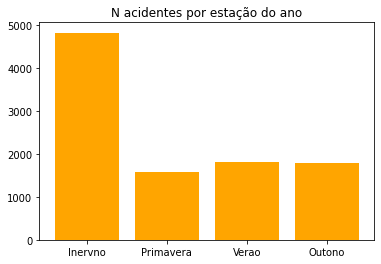

In [34]:
estacoes_dict= dict((i, estacoes.count(i)) for i in estacoes)
plt.bar(estacoes_dict.keys(), estacoes_dict.values(),   width = 0.8, color = 'orange')
plt.title("N acidentes por estação do ano")


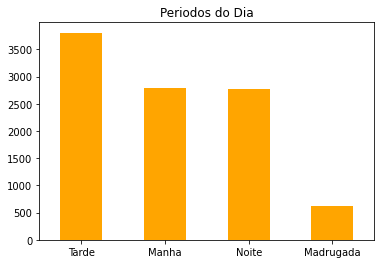

In [35]:
#Periodo do dia

acidentes_df['Periodo do Dia'].value_counts().plot(kind = 'bar',rot = 0,color='orange',title="Periodos do Dia")

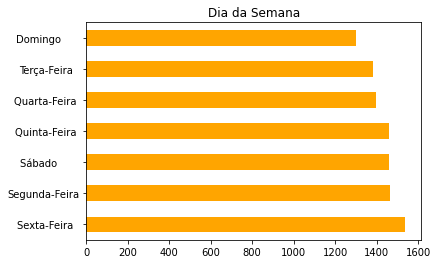

In [36]:
#dias da semana
acidentes_df['Dia da Semana'].value_counts().plot(kind = 'barh',rot = 0,color='orange',title="Dia da Semana")

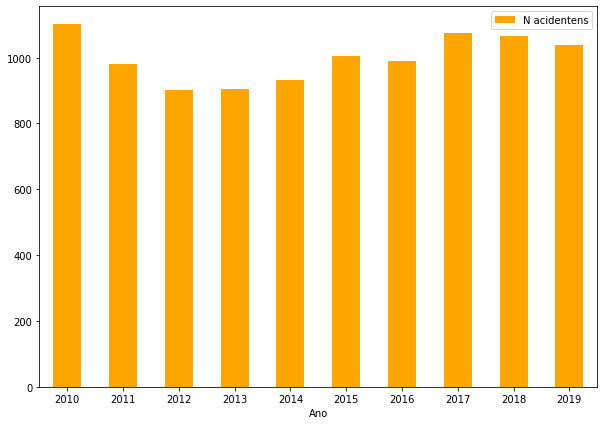

In [37]:
ano_groupby=acidentes_df.groupby(acidentes_df['Data'].str.split(':').str[0])
df = pd.DataFrame({'Ano':ano_groupby.groups.keys(), 'N acidentens':ano_groupby.size()})
ax = df.plot.bar(x='Ano', y='N acidentens', rot=0,figsize=(10, 7),color='orange')

## **Pergunta 4**

4. Verify which characteristics are unbalanced (have much more elements of one class
than the others). Present graphical views of the distributions of some unbalanced
characteristics you deem relevant for the problem;

In [38]:
acidentes_df.columns

Index(['Velocidade local', 'Dia da Semana', 'Cond Aderência', 'Zona',
       'Tipos Vias', 'Estado Conservação', 'Factores Atmosféricos',
       'Reg Circulação1', 'Intersecção Vias', 'Localizações', 'Luminosidade',
       'Marca Via', 'Natureza', 'Obras Arte', 'Sinais', 'Sinais Luminosos',
       'Tipo Piso', 'Traçado 1', 'Traçado 2', 'Traçado 3', 'Traçado 4',
       'Via Trânsito', 'Periodo do Dia', 'Tipo de Acidente', 'Data'],
      dtype='object')

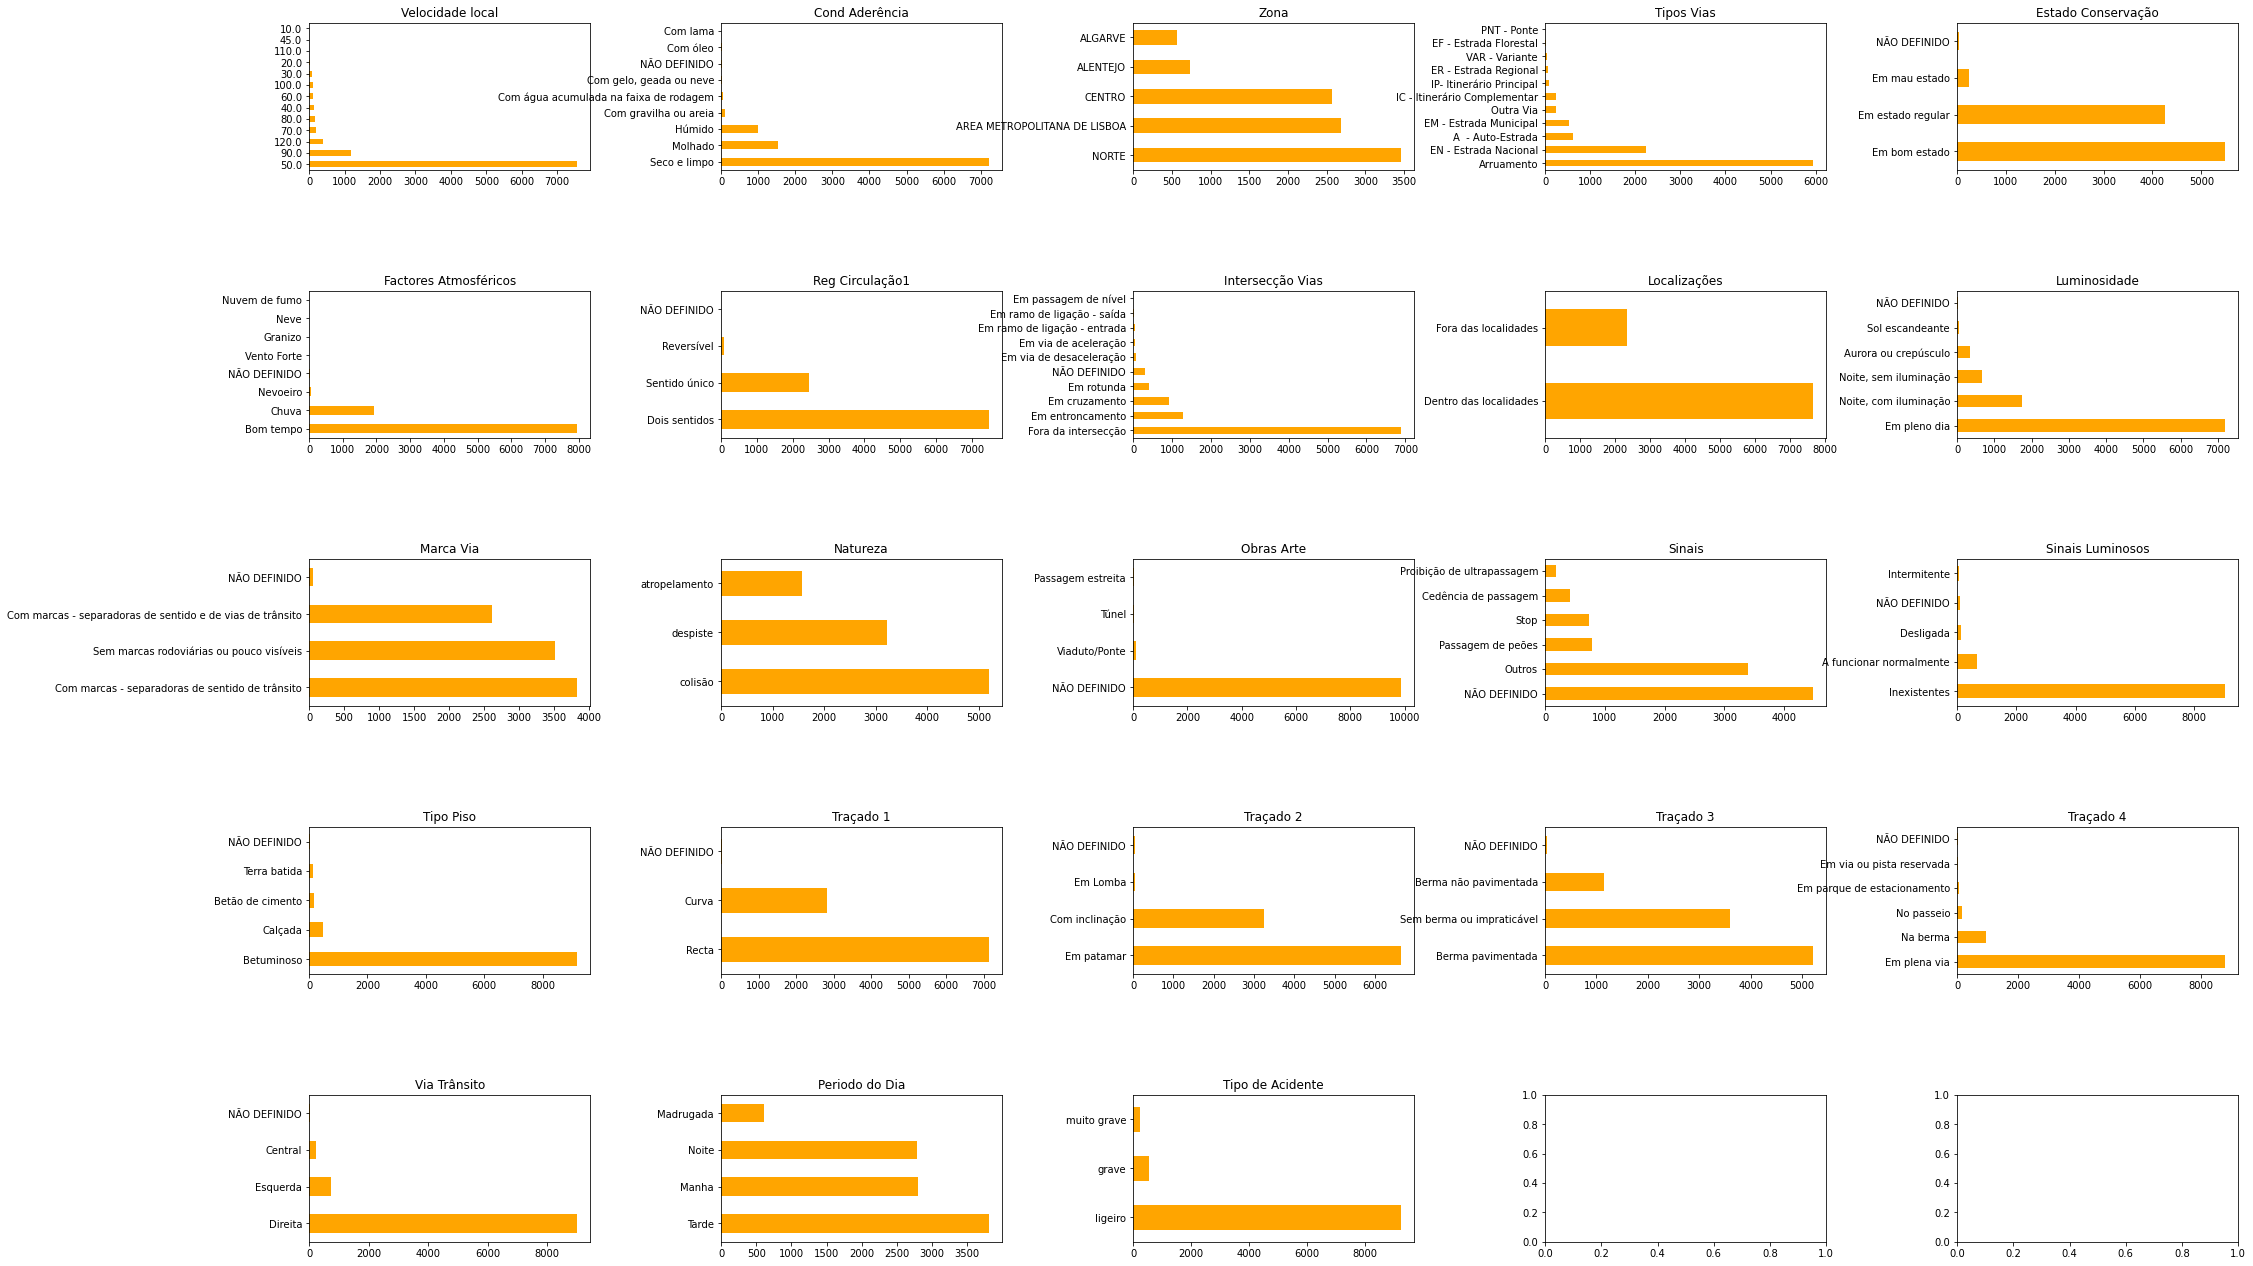

In [39]:
atributos = ['Velocidade local',  'Cond Aderência', 'Zona',
       'Tipos Vias', 'Estado Conservação', 'Factores Atmosféricos',
       'Reg Circulação1', 'Intersecção Vias', 'Localizações', 'Luminosidade',
       'Marca Via', 'Natureza', 'Obras Arte',
       'Sinais', 'Sinais Luminosos', 'Tipo Piso', 'Traçado 1', 'Traçado 2',
       'Traçado 3', 'Traçado 4', 'Via Trânsito', 'Periodo do Dia',
       'Tipo de Acidente' ]

fig, axes = plt.subplots(nrows = 5,ncols = 5,figsize = (30,20))
fig.tight_layout(pad=10.0)
for i, item in enumerate(atributos):
    if i < 5:
        ax = acidentes_df[item].value_counts().plot(kind = 'barh',ax=axes[0,i],rot = 0,color='orange')
        
    elif i >=5 and i < 10:
        ax = acidentes_df[item].value_counts().plot(kind = 'barh',ax=axes[1,i-5],rot = 0, color='orange')
        
    elif i >=10 and i < 15:
        ax = acidentes_df[item].value_counts().plot(kind = 'barh',ax=axes[2,i-10],rot = 0, color='orange')
    elif i >=15 and i < 20:
        
        ax = acidentes_df[item].value_counts().plot(kind = 'barh',ax=axes[3,i-15],rot = 0, color='orange')
    elif i >=20 and i < 25:
        ax = acidentes_df[item].value_counts().plot(kind = 'barh',ax=axes[4,i-20],rot = 0, color='orange')
   
    ax.set_title(item)

    #unbalanced  'Cond Aderência','Obstáculos','Obras Arte', 'Tipo Piso','Sinais Luminosos'

## **Pergunta 5**

5. Calculate correlations between variables and explain any high correlations found;
https://www.statology.org/correlation-between-categorical-variables/

Categoricas:
https://www.statstest.com/cramers-v-2/

**Cramer’s V**

The analysis will result in a Cramer’s V value and a p-value. Cramer’s V ranges from 0 to 1, where 0 indicates no relationship and 1 indicates perfect association

The p-value represents the chance of seeing our results if there was no actual relationship between our variables. A p-value less than or equal to 0.05 means that our result is statistically significant and we can trust that the difference is not due to chance alone.

In [40]:

def cramer_correl(feature1, feature2):
  l = acidentes_df.groupby([feature1, feature2]).size().unstack(fill_value=0)
  data = l.values
  X2 = stats.chi2_contingency(data, correction=False)[0]
  n = np.sum(data)
  minDim = min(data.shape)-1
  V = np.sqrt((X2/n) / minDim)
  return V



In [41]:
def cramer_matrix(data):
  matrix=[]
  for  x in range(len(data.columns)):
    line = []
    for  y in range(len(data.columns)):      
      line.append(round(cramer_correl(data.columns[x], data.columns[y]),2))
    matrix.append(line)
  return matrix 


In [42]:
m = cramer_matrix()
dd = pd.DataFrame(m, index = acidentes_df.columns, columns = acidentes_df.columns)

[Text(0, 0.5, 'Velocidade local'),
 Text(0, 1.5, 'Dia da Semana'),
 Text(0, 2.5, 'Cond Aderência'),
 Text(0, 3.5, 'Zona'),
 Text(0, 4.5, 'Tipos Vias'),
 Text(0, 5.5, 'Estado Conservação'),
 Text(0, 6.5, 'Factores Atmosféricos'),
 Text(0, 7.5, 'Reg Circulação1'),
 Text(0, 8.5, 'Intersecção Vias'),
 Text(0, 9.5, 'Localizações'),
 Text(0, 10.5, 'Luminosidade'),
 Text(0, 11.5, 'Marca Via'),
 Text(0, 12.5, 'Natureza'),
 Text(0, 13.5, 'Obras Arte'),
 Text(0, 14.5, 'Sinais'),
 Text(0, 15.5, 'Sinais Luminosos'),
 Text(0, 16.5, 'Tipo Piso'),
 Text(0, 17.5, 'Traçado 1'),
 Text(0, 18.5, 'Traçado 2'),
 Text(0, 19.5, 'Traçado 3'),
 Text(0, 20.5, 'Traçado 4'),
 Text(0, 21.5, 'Via Trânsito'),
 Text(0, 22.5, 'Periodo do Dia'),
 Text(0, 23.5, 'Tipo de Acidente'),
 Text(0, 24.5, 'Data')]

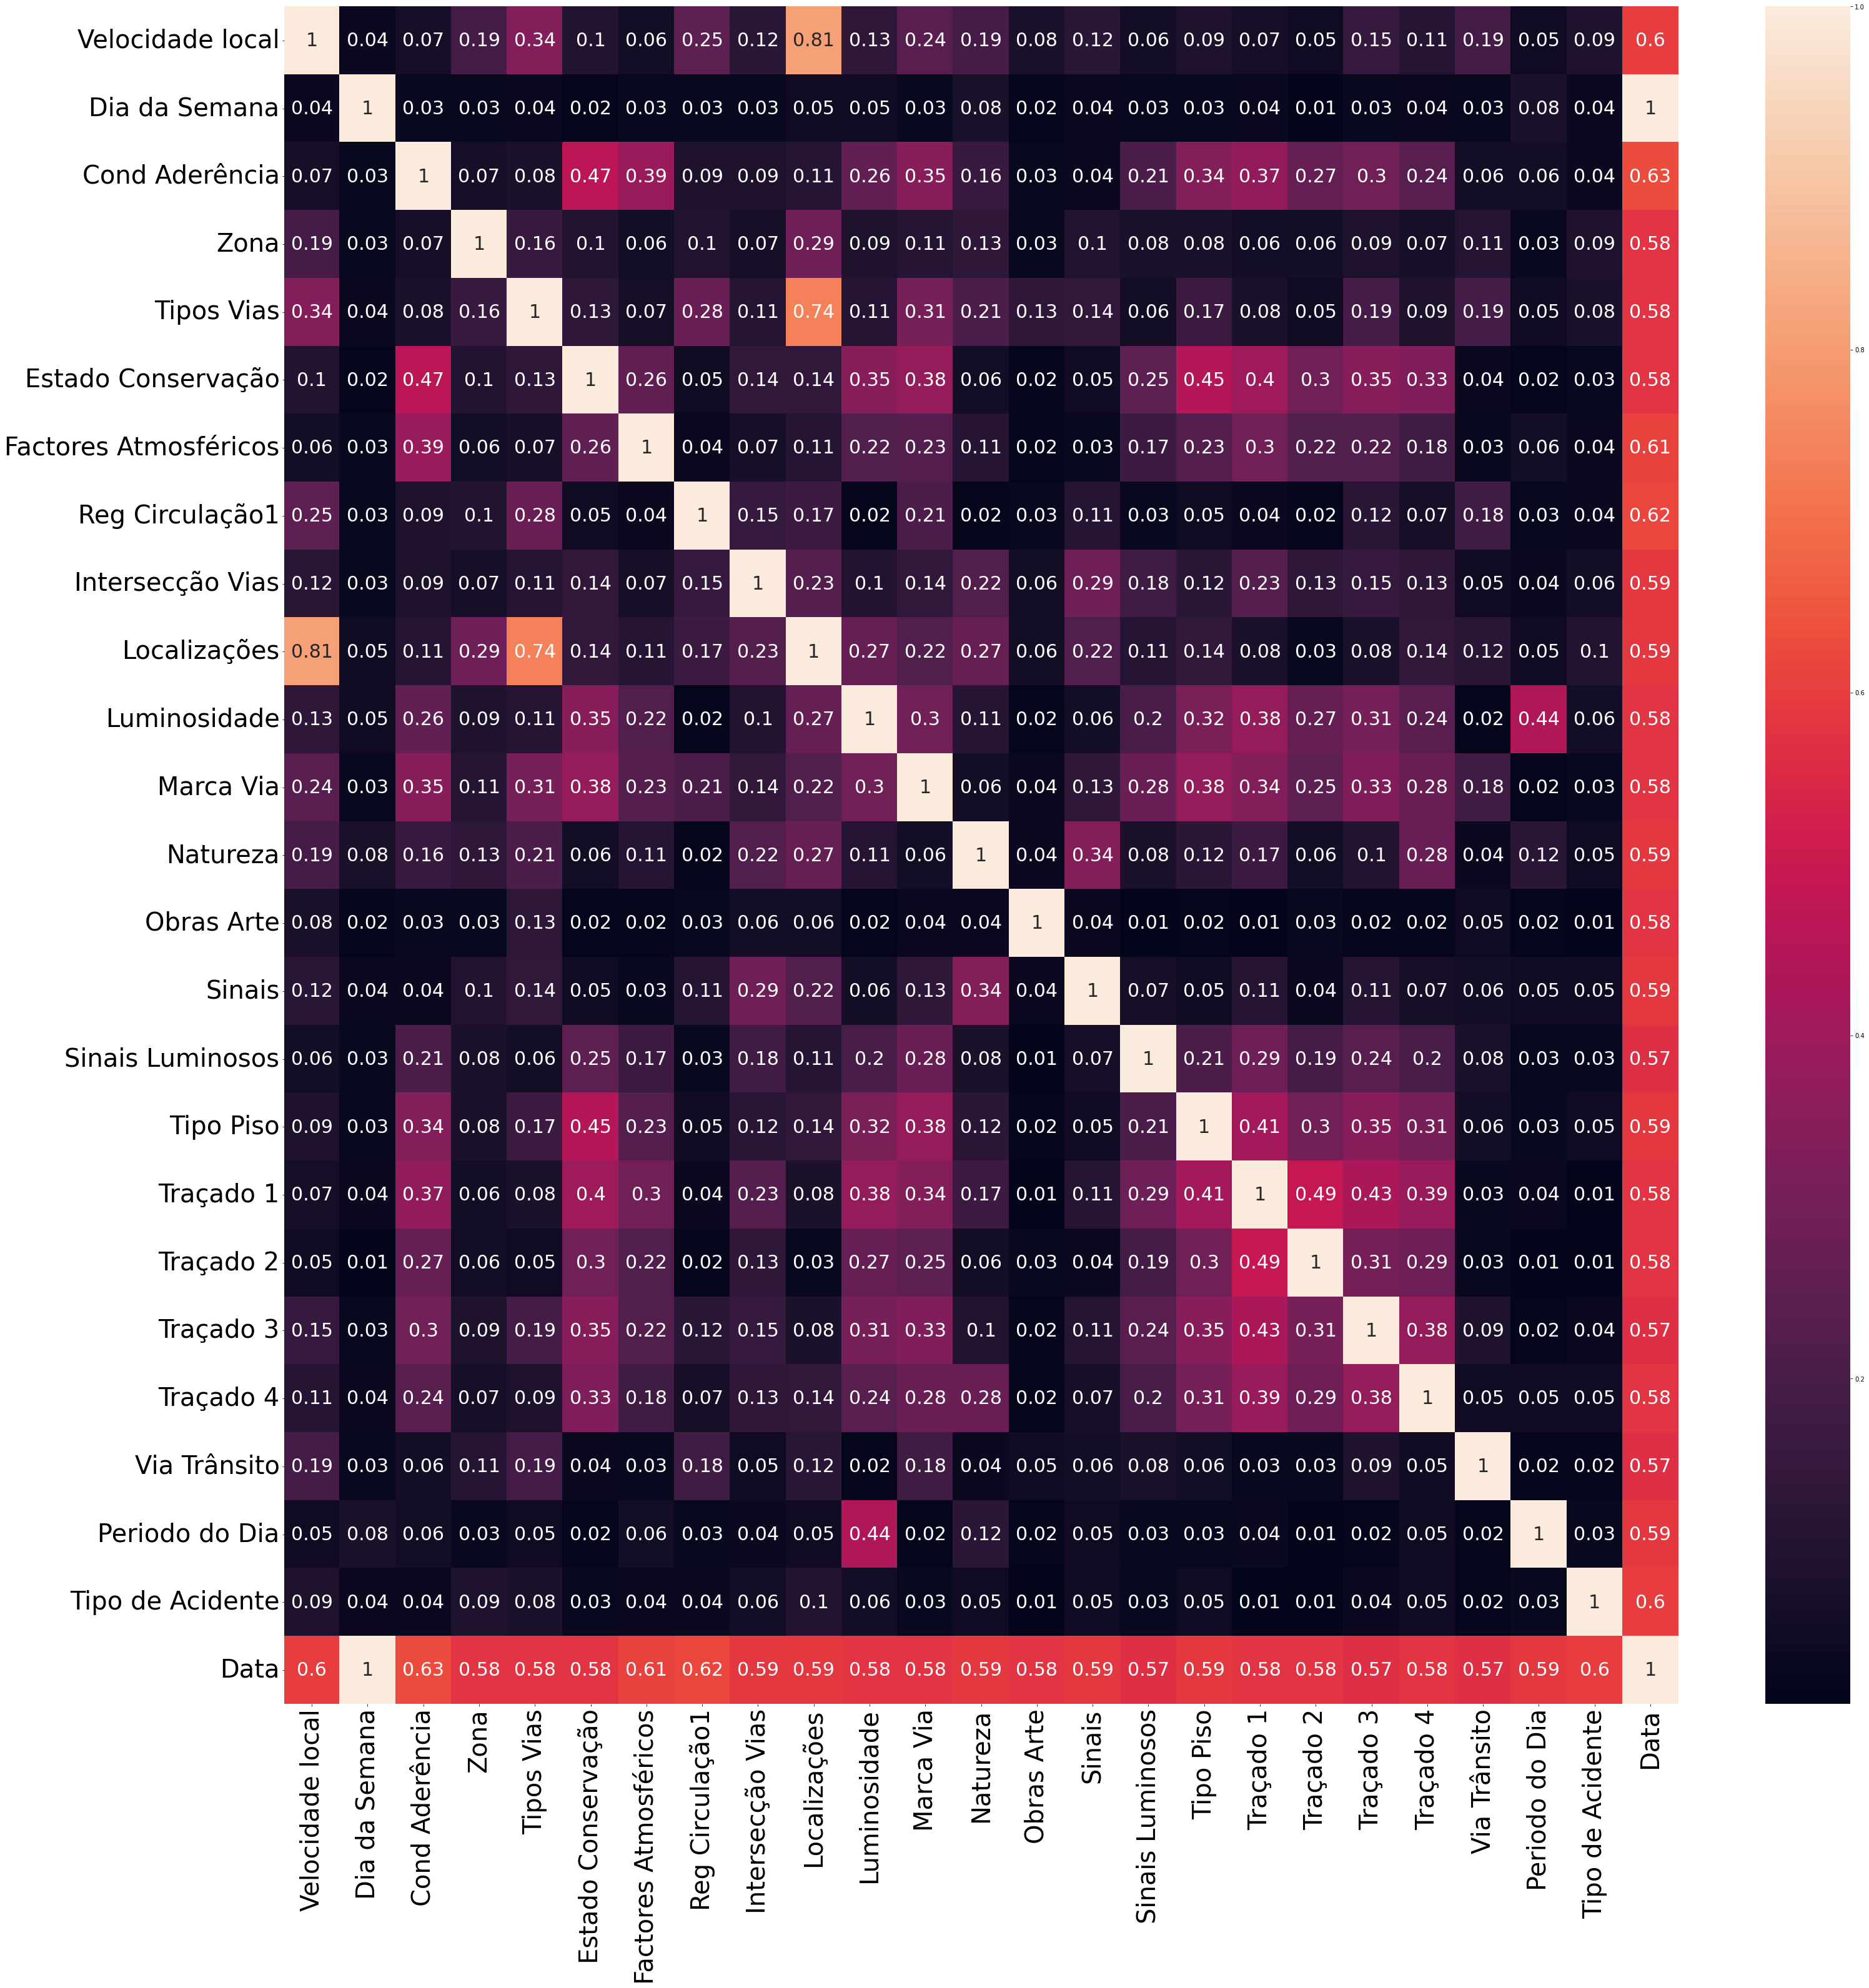

In [47]:
fig, ax = plt.subplots(figsize=(50,50)) 
hm=sns.heatmap(dd, annot=True,ax=ax,annot_kws={'size': 30})
hm.set_xticklabels(hm.get_xmajorticklabels (), fontsize = 40)
hm.set_yticklabels(hm.get_ymajorticklabels (), fontsize = 40,rotation=360)



In [52]:
!pip install pandas>=1.4.2
!pip install dython


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
from dython import nominal


ContextualVersionConflict: ignored

# **Coisas**

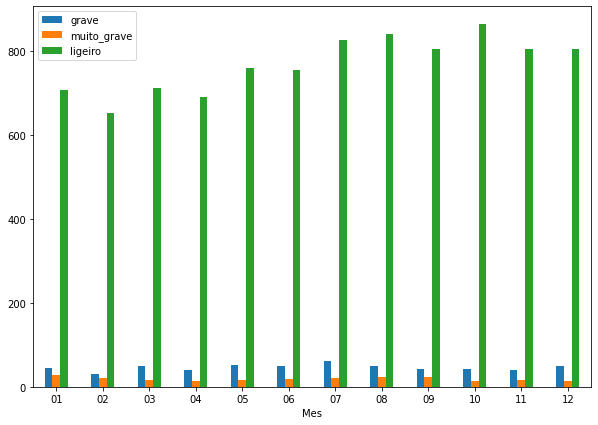

In [ ]:

type_mes_groupby = acidentes_df.groupby([ 'Tipo de Acidente','Mes']).size()
grave=type_mes_groupby['grave'].tolist()
muito_grave=type_mes_groupby['muito grave'].tolist()
ligeiro=type_mes_groupby['ligeiro'].tolist()

df = pd.DataFrame({'Mes':mes_groupby.groups.keys(), 'grave':grave,'muito_grave':muito_grave,'ligeiro':ligeiro})
ax = df.plot.bar(x='Mes', y=['grave','muito_grave','ligeiro'], rot=0,figsize=(10, 7))



In [ ]:
data_graves= acidentes_df[(acidentes_df['Num. Feridos ligeiros a 30 dias']>0) &(acidentes_df['Num. Feridos graves a 30 dias']==0) & (acidentes_df['Num. Mortos a 30 dias']==0)]

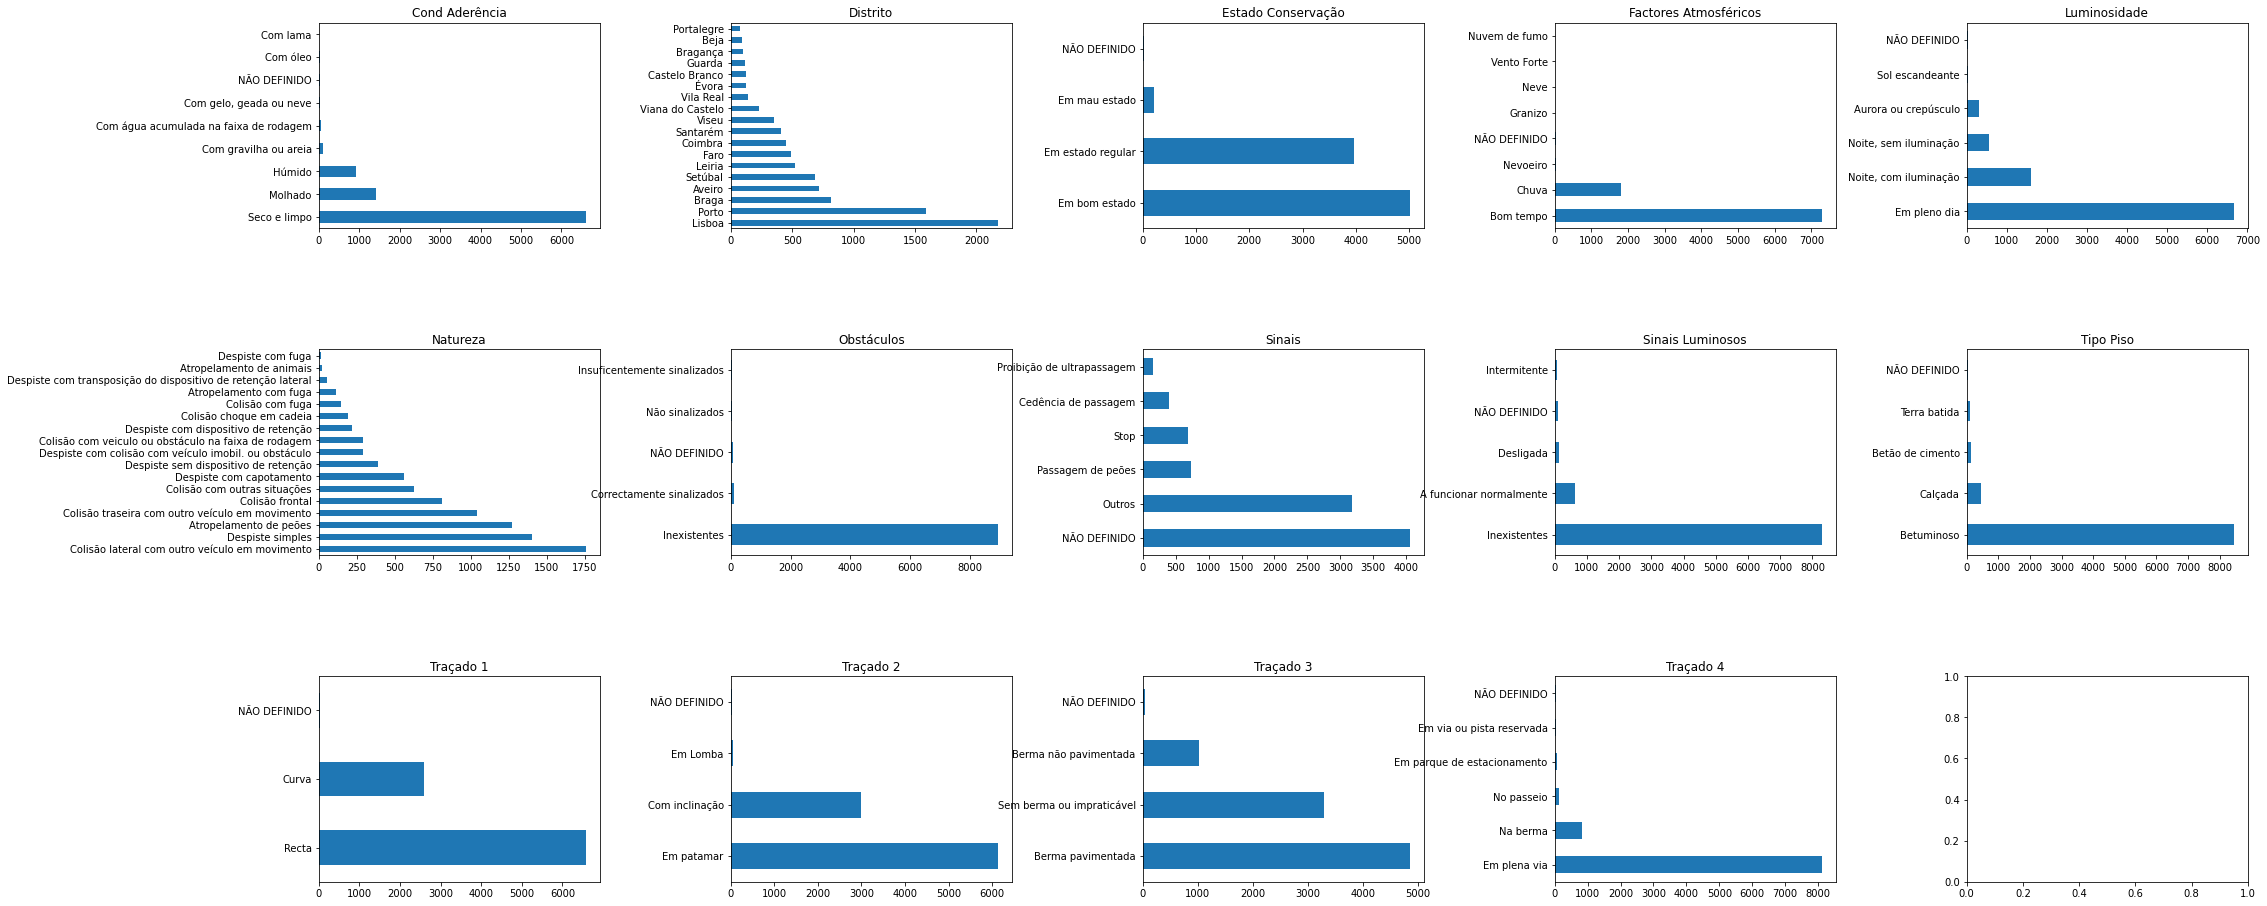

In [ ]:
services = ['Cond Aderência','Distrito','Estado Conservação','Factores Atmosféricos',
            'Luminosidade','Natureza','Obstáculos','Sinais','Sinais Luminosos',
            'Tipo Piso','Traçado 1','Traçado 2','Traçado 3','Traçado 4']

fig, axes = plt.subplots(nrows = 3,ncols = 5,figsize = (30,15))
fig.tight_layout(pad=10.0)
for i, item in enumerate(services):
    if i < 5:
        ax = data_graves[item].value_counts().plot(kind = 'barh',ax=axes[0,i],rot = 0)
        
    elif i >=5 and i < 10:
        ax = data_graves[item].value_counts().plot(kind = 'barh',ax=axes[1,i-5],rot = 0)
        
    elif  i < 15:
        ax = data_graves[item].value_counts().plot(kind = 'barh',ax=axes[2,i-10],rot = 0)
   
    ax.set_title(item)

In [ ]:
data['Datahora']=data['Datahora'].str.split(' ').str[-1]

In [ ]:
data=data.rename(columns={"Datahora": "Hora"})

In [ ]:
hours=['06:00:00','12:00:00','18:00:00']
d=pd.to_datetime(hours)

# mornin=data[(data['Hora']>=hours[1]) & (data['Hora']<hours[2])  ]
# print(mornin)
feridos=[]
for ind in data.index:
  print(data['Hora'][ind])
  if data['Hora'][ind]<hours[0]:
    feridos.append('Madrugada')
  elif (data['Hora'][ind]>=hours[0]) & (data['Hora'][ind]<hours[1]):
    feridos.append('Manha')
  elif  (data['Hora'][ind]>=hours[1]) & (data['Hora'][ind]<hours[2]):
    feridos.append('Tarde')
  else:
    feridos.append('Noite')

print(feridos)

# conditions = [
#     (data[data['Hora'] <hours[0]]),
#     (data[(data['Hora']>=hours[0]) & (data['Hora']<hours[1])]),
#     ( data[(data['Hora']>=hours[1]) & (data['Hora']<hours[2])  ]),
#     ( data[data['Hora']>=hours[2]])
# ]
# values=['Madrugada','Manha','Tarde','Noite']

# import numpy as np

# print(np.select(conditions, values))


14:15:00
11:15:00
12:45:00
11:50:00
19888    20:00:00
19888    18:40:00
Name: Hora, dtype: object


ValueError: ignored

In [ ]:
# feridos=['ligeiros', 'greves','mortes']
# n_feridos=[]
# n_feridos.append(data['Num. Feridos ligeiros a 30 dias'].sum())
# n_feridos.append(data['Num. Feridos graves a 30 dias'].sum())
# n_feridos.append(data['Num. Mortos a 30 dias'].sum())

# df = pd.DataFrame({'Feridos':feridos, 'N Feridos/Mortos':n_feridos})
# ax = df.plot.bar(x='Feridos', y='N Feridos/Mortos', rot=0)